## Projeto de Machine Learning / Machine Learning Project

**Objetivo**: Através dos Dados do Censo detectar se a renda da pessoa excede o valor de 50 mil dólares por ano.

**Objective**: Through Census Data detects if the people income exceeds the fifty thousand dollars a year

**Dataset**: O conjunto de dados para este projeto é originário do Repositório de Aprendizado de Máquina da UCI (https://archive.ics.uci.edu/ml/datasets/Adult)

**Dataset**: The dataset that I use in that project is From Machine Learning UCI repository (https://archive.ics.uci.edu/ml/datasets/Adult)

### Importando as bibliotecas / Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import NearMiss
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib
import warnings
warnings.filterwarnings("ignore")

C:\Users\LuisFS\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Colunas do Dataset / Dataset Columns

**Age**: Idade.

------------------------------------------------------------------------------------------------------------------------
**Workclass**: Classe trabalhadora. Se a pessoa é funcionário público, autônomo, empresário etc.

**WorkClass**: If the person is a civil servant, owner, entrepreneur, etc.

------------------------------------------------------------------------------------------------------------------------
**Education**: Níveis de Escolaridade.

**Education**: Level of Schooling

------------------------------------------------------------------------------------------------------------------------
**Education-num**: Código do Nível de Escolaridade.

**Education-num**: Education Level code

------------------------------------------------------------------------------------------------------------------------
**Marital-status**: Estado Civil.

------------------------------------------------------------------------------------------------------------------------
**Occupation**: Ocupação (Suporte técnico, Conserto de arte, Outros serviços, Vendas, Exec-managerial, Prof-specialty, Manipuladores de limpeza, Machine-op-inspct, Adm-clerical, Pesca agropecuária, Transport-moving, Priv-house-serv, Serviço de Proteção, Forças Armadas)

***Occupation**:Technical support, Art repair, Other services, Sales, Exec-managerial, Prof-specialty, Cleaning handlers, Machine-op-inspct, Adm-clerical, Farm fishing, Transport-moving, Priv-house-serv, Service of Protection, Armed Forces

------------------------------------------------------------------------------------------------------------------------
**Relationship**: Relacionamento (Esposa, Filha Própria, Marido, Não-familiar, Outro-parente, Solteira.)

**Relationship**: Wife, Own Daughter, Husband, Non-family, Other-relative, Single

------------------------------------------------------------------------------------------------------------------------
**Race**: Raça (Preto, branco, asiático-Pac-Islander, Amer-Indian-Eskimo, Outro.)

**Race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other.

------------------------------------------------------------------------------------------------------------------------
**Sex**: Sexo(Feminino, Masculino)

**Sex**: Female, male

------------------------------------------------------------------------------------------------------------------------
**Capital-gain**: Ganho de Capital.

**Capital-loss**: Perda de Capital.

------------------------------------------------------------------------------------------------------------------------
**Hours-per-week**: Horas de trabalho por Semana.

**Hours_per_week**: Working hours per week

------------------------------------------------------------------------------------------------------------------------
**Native-country**: País Nativo (Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, EUA (Guam-USVI-etc), Índia, México, Portugal etc)

**Native-country**: United States, Cambodia, England, Puerto Rico, Canada, Germany, USA (Guam-USVI-etc), India, Mexico, Portugal etc

In [2]:
ds = pd.read_csv('adult.data')

In [3]:
ds.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


- Se eu não utilizar o na_values='?', quanto for buscar por valores nulos não haverá nenhum, e meu modelo de machine learning será bem inviezada

- Utilizo o chunksize para a conseguir trablhar com o melhor desempenho com dados grandes
--------------------------------------------------------------------------------------------------------------------------

- If I do not use na_values='?', when I search for null values, I will not find it, and my Machine Learning will be unbiased

- I am using the chunksize to work with large datasets

In [4]:
ds = pd.DataFrame()
for chunk in pd.read_csv('adult.data',na_values= '?', chunksize=10000):
    ds = pd.concat([ds, chunk])

## Analise de dados / Data Analysis

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       46033 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   sex              48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   47985 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [6]:
ds.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
ds['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [8]:
ds['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [9]:
# Descrição de váriaveis categóricas
# description of the categorical variables
ds.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [10]:
ds["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

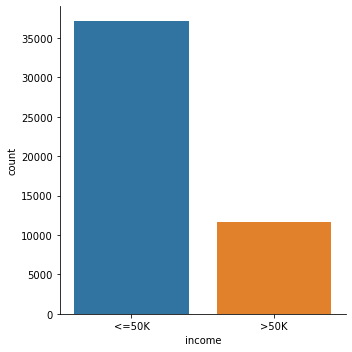

In [11]:
sns.catplot(x="income",kind="count",data=ds,orient="h")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '11th'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, 'Assoc-acdm'),
  Text(3, 0, 'Some-college'),
  Text(4, 0, '10th'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, '7th-8th'),
  Text(7, 0, 'Bachelors'),
  Text(8, 0, 'Masters'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, '5th-6th'),
  Text(11, 0, 'Assoc-voc'),
  Text(12, 0, '9th'),
  Text(13, 0, '12th'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Preschool')])

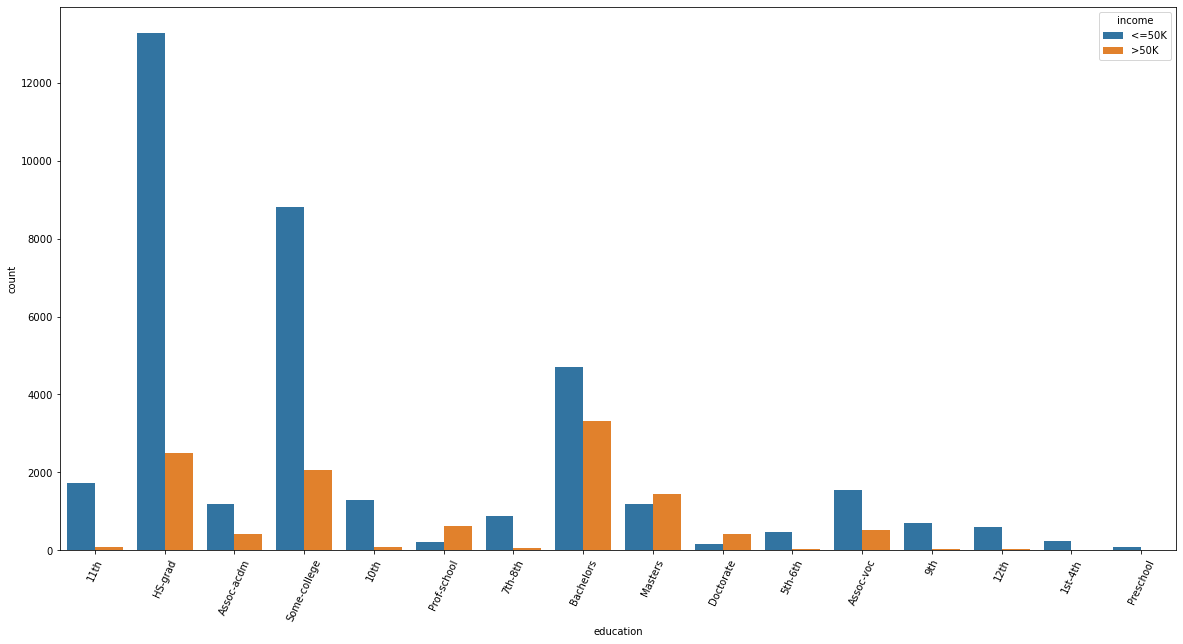

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(data=ds,x="education", hue="income")
plt.xticks(rotation=65)

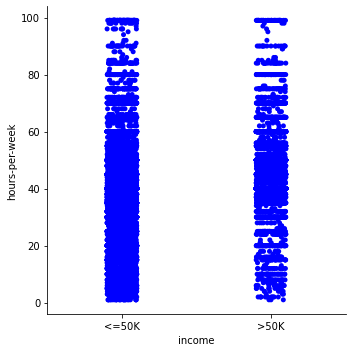

In [13]:
sns.catplot(x='income',y='hours-per-week',color='b',data=ds)

<AxesSubplot:xlabel='sex', ylabel='count'>

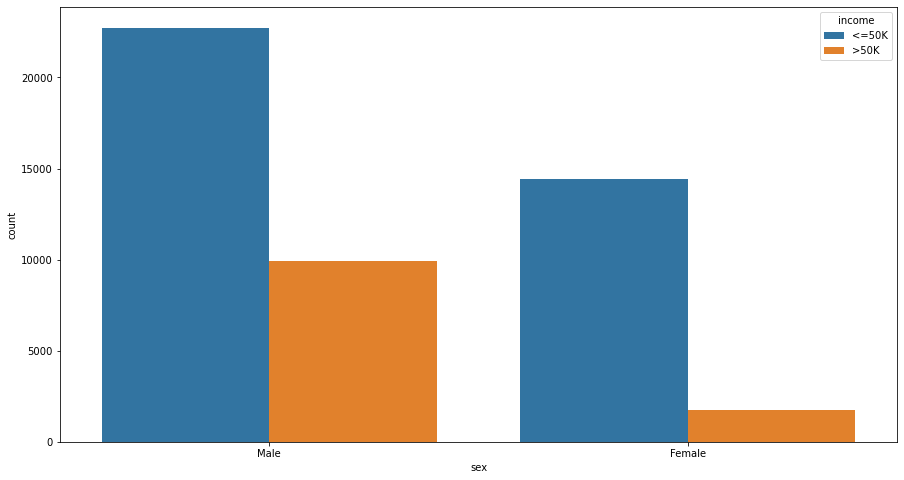

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x="sex",hue="income",data=ds)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'

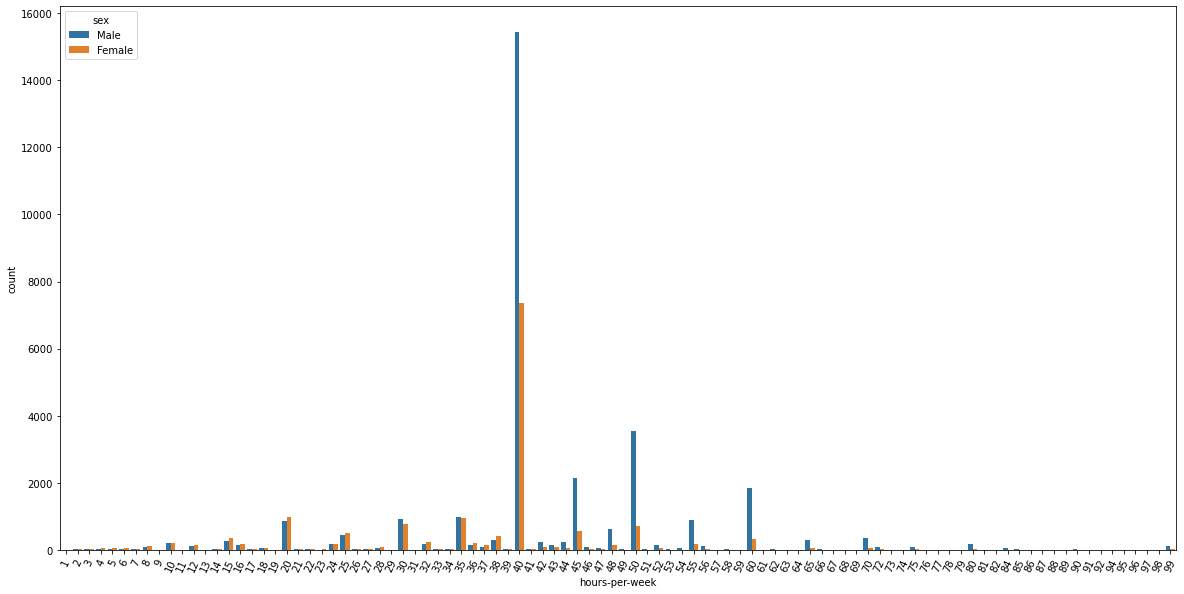

In [15]:
plt.figure(figsize=(20, 10))
sns.countplot(x="hours-per-week",hue="sex",data=ds)
plt.xticks(rotation=65)

<AxesSubplot:xlabel='age', ylabel='count'>

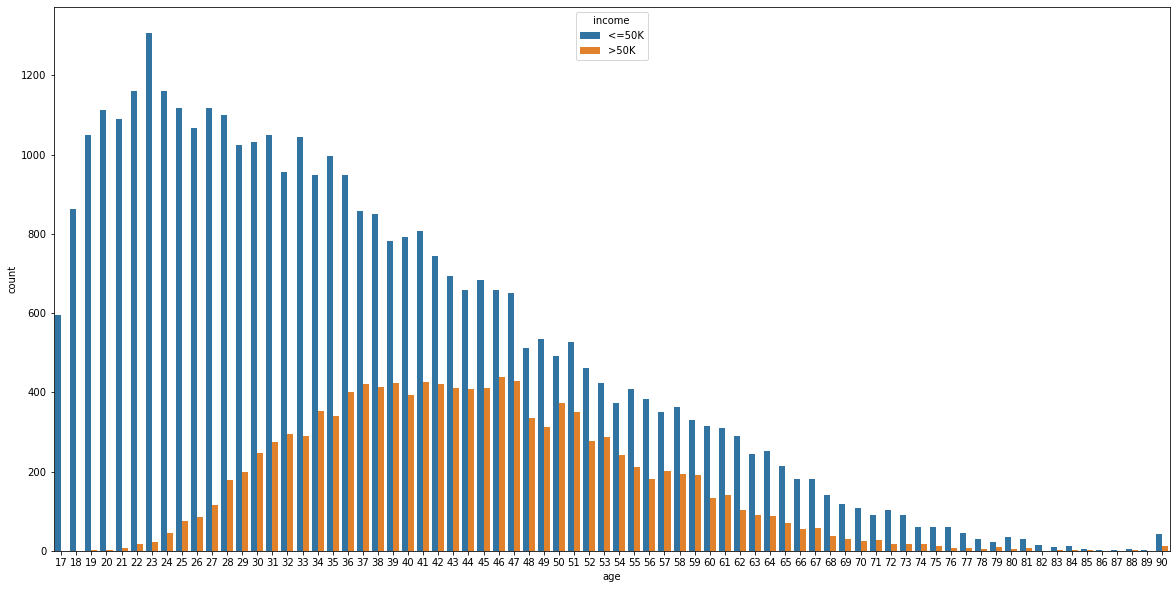

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x="age",hue="income",data=ds)

<AxesSubplot:xlabel='workclass', ylabel='count'>

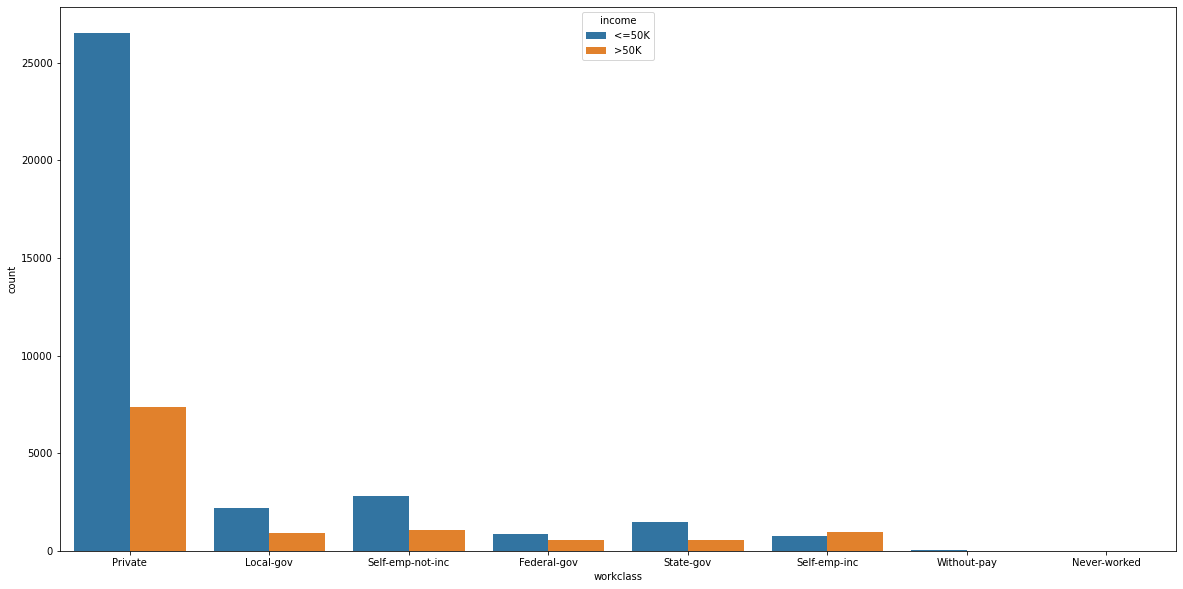

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x="workclass", hue="income",data=ds)

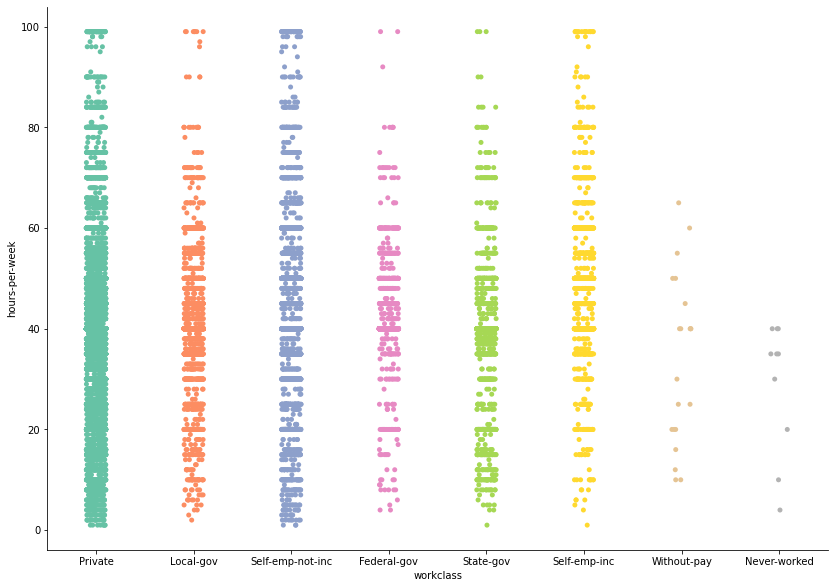

In [18]:
sns.catplot(x="workclass", y="hours-per-week", palette="Set2", data=ds,
            height=8.27, aspect=11.7/8.27)

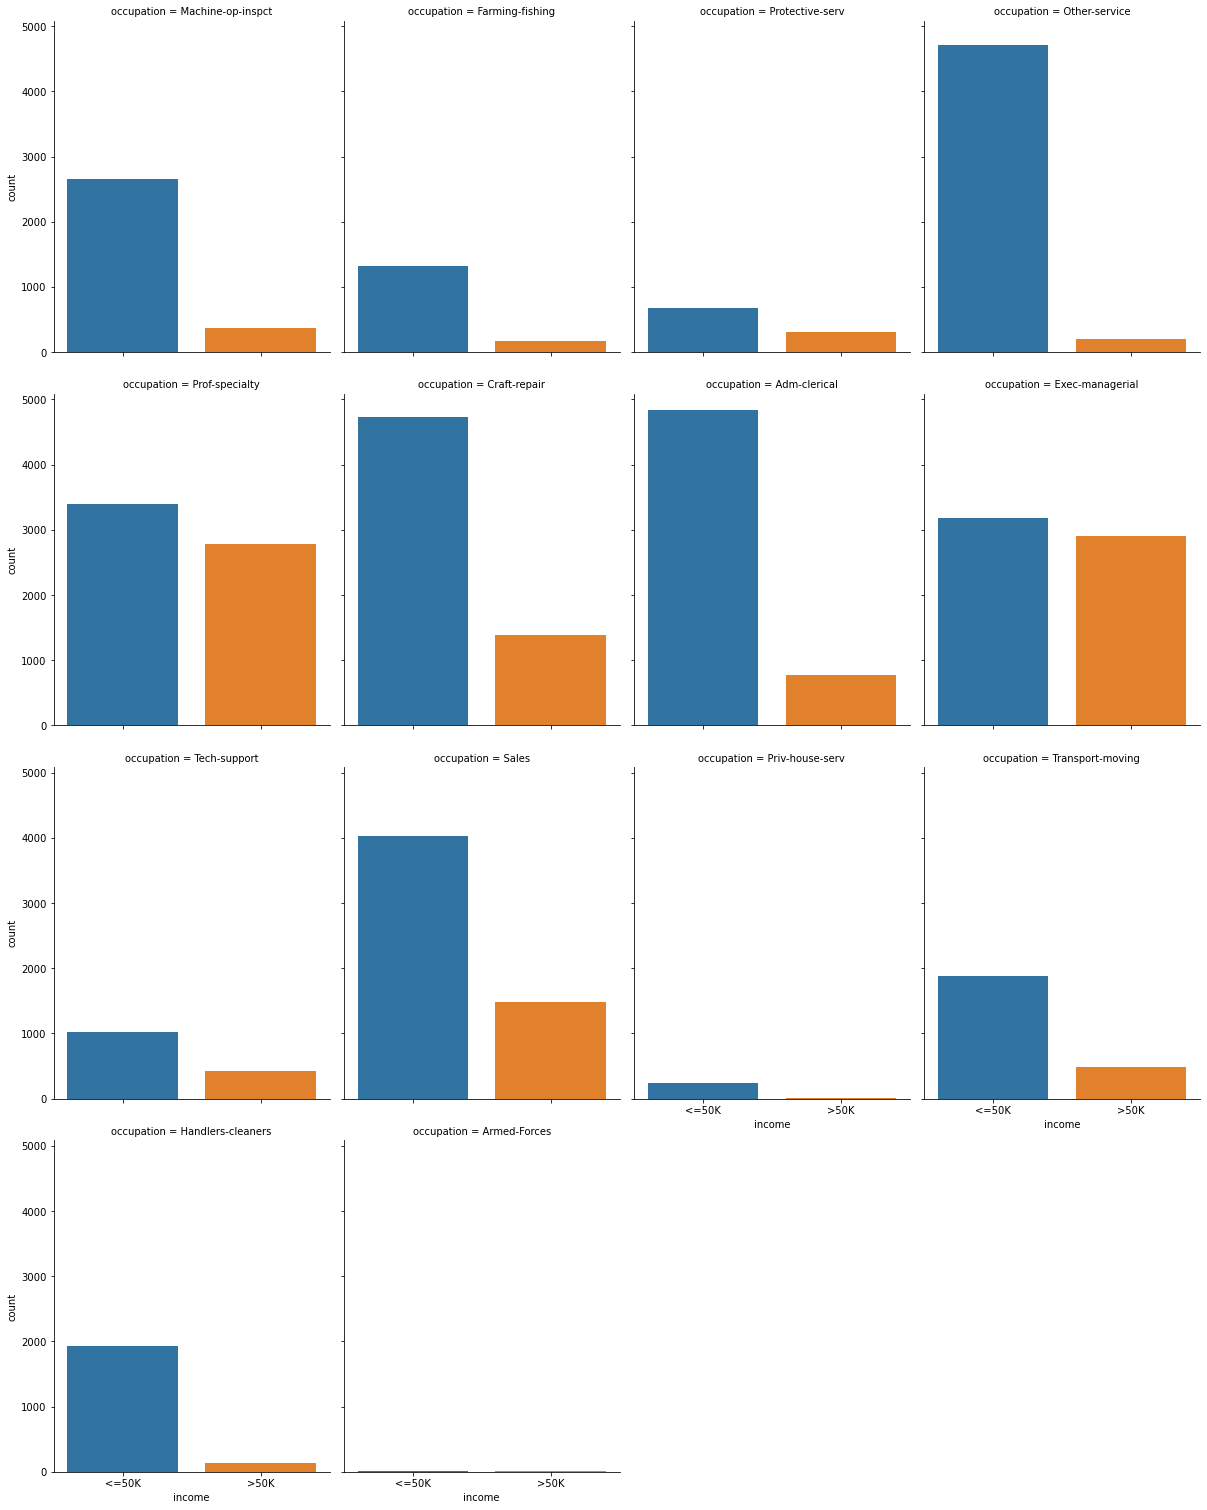

In [19]:
g = sns.catplot(x="income", col="occupation", col_wrap=4,
                data=ds,
                kind="count", height=5.27, aspect=.8)                         

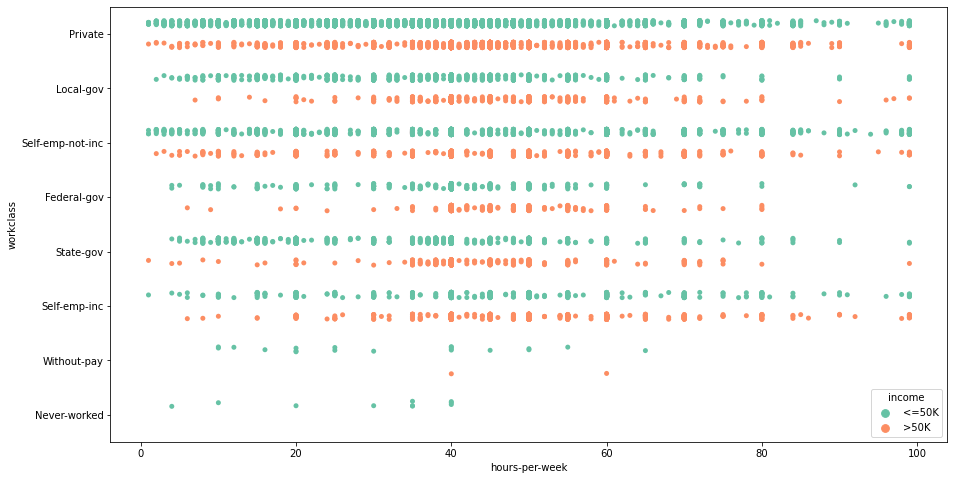

In [20]:
plt.figure(figsize=(15,8))
ax = sns.stripplot(x="hours-per-week", y="workclass", hue="income",
                   data=ds, palette="Set2", dodge=True)

### Alguns insights / Some Insights

- Quem tem High school ou some college tem uma probabilidade baixa de ganhar acima dos 50k anuais
- Há uma tendência de quem ganha acima igual ou acima de 50k trabalhar entre 37 a 60 horas semanais
- Até 37 horas se ve uma dominancia pelas mulheres, passando de 38 horas os homens costumam trabalhar mais
- Se vc tiver prof school, masters degree or doctorate a chance de ganhas mais de 50k aumenta
- Você tera mais chance se tive entre 34 anos a 51 anos de  ganhar 50k 
- Duas ocupações tem 3 vezes a chance de ganhar mais do que 50K anuais (Prof-speciality e Exec-managerial)
- Existe uma quantidade muito grande trabalhores em empresas privadas, consequentemente pessoas que trablham para elas conquistam uma melhor condição para salarios mais altos, ou se optar trabalhador autonomo propria seria uma outra opção para uma possibilidade de maior remuneração.

--------------------------------------------------------------------------------------------------------------------------

- People who has high school degree or some college has a low probability to achieve =>50k annual salary
- There are a trend that who has a salary iqual or over 50k work between 37 to 60 hours
- The graph show us that women has dominance work up to 38 hours per week, after that, the number of men working per week grow
- Prof school, master degree and doctorate increases the chance to have a salay over 50k
- to 34 to 51 years old the chances of earning over than 50k increase
- Two occupation have 3 times the chance to win more than 50k yearly (Prof-speciality e Exec-managerial)
- There is a very large number of workers in private companies, consequently people who are self-employee a better condition for higher salaries, or if you choose to work on your own it would be another option for a possibility of higher remuneration. 

## Concatenando duas colunas em uma
## Concatenating two columns into one

In [21]:
def remove_features(lista_features):
    for i in lista_features:
        ds.drop(i, axis=1, inplace=True)
        return 0

In [22]:
ds["to-capital"] = ds["capital-gain"] - ds["capital-loss"]
remove_features(['capital-gain'])
remove_features(['capital-loss'])

0

## Verificando dados nulos
## Checking null data

<AxesSubplot:>

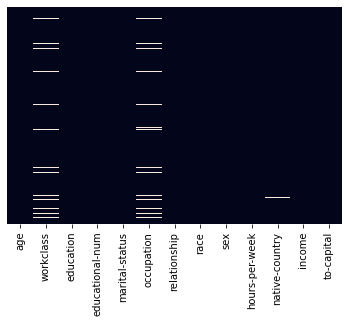

In [23]:
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False)

In [24]:
# Preenchendo os dados que falta
# filling in missing data
ds['workclass']=ds['workclass'].fillna(ds['workclass'].mode()[0])
ds['occupation']=ds['occupation'].fillna(ds['occupation'].mode()[0])
ds['native-country']=ds['native-country'].fillna(ds['native-country'].mode()[0])

In [25]:
ds.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
hours-per-week     0
native-country     0
income             0
to-capital         0
dtype: int64

## Transformando dados categoricos em númericos 
## Change categorical features to numerical

- Utilizarei o  Label encoder pois ele gera valores unicos,o onehotencoder traz varios valores multiplicando ou triplicando as colunas, como ja tenho  um dataset  grande ultilizar o (ohe) só diminuira minha performace por ser bastante pesado, e é o que eu preciso para subistituir os valores categoricos neste dataset

---------------------------------------------------------------------------------------------------------------------------
- I will use the Label Encoder, it generates unique values. The OneHotEncoder bring to us new values multiplying or tripling the columns, I have a big dataset, so it will decrase my performance for being quite heavy, and the Label Encoder is what I need to replace categorical values

In [26]:
col = ds[ds.select_dtypes(['object']).columns]
lenc = LabelEncoder()
for c in col:
   ds[c] = lenc.fit_transform(list(ds[c].values))

In [27]:
ds.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,to-capital
0,25,3,1,7,4,6,3,2,1,40,38,0,0
1,38,3,11,9,2,4,0,4,1,50,38,0,0
2,28,1,7,12,2,10,0,4,1,40,38,1,0
3,44,3,15,10,2,6,0,2,1,40,38,1,7688
4,18,3,15,10,4,9,3,4,0,30,38,0,0


In [28]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int64
 2   education        48842 non-null  int64
 3   educational-num  48842 non-null  int64
 4   marital-status   48842 non-null  int64
 5   occupation       48842 non-null  int64
 6   relationship     48842 non-null  int64
 7   race             48842 non-null  int64
 8   sex              48842 non-null  int64
 9   hours-per-week   48842 non-null  int64
 10  native-country   48842 non-null  int64
 11  income           48842 non-null  int64
 12  to-capital       48842 non-null  int64
dtypes: int64(13)
memory usage: 4.8 MB


### Utilizando modelos de Machine Learning nos meus dados
### Utilizing Machine Learning Models in my data

In [29]:
#Definindo o X e o y
X = ds.drop('income', axis=1)
y = ds['income']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### prevendo a acurácia com alguns modelos
### predicting the accuracy with different models

In [31]:
svm = svm.SVC().fit(X[:-30],y[:-30])
knn = KNeighborsClassifier(n_neighbors=3)
tree_clf = DecisionTreeClassifier(random_state=1)
rclf = RandomForestClassifier()
xgb = XGBClassifier()

In [32]:
# Criando uma função para avaliar a acurácia
# Creating a function to evauate accuracy
def Accuracy(clf,X,y):
    results = cross_val_predict(clf, X, y, cv=5)
    return metrics.accuracy_score(y,results)

- O melhor modelo é o XGBoostClassifier como podemos ver a comparação de acurácias
- The best model is the XGBoostClassifier we see the comparisson of the accuracy

In [33]:
print("randomForest accuracy:{}".format(Accuracy(rclf,X,y)))
print("decisiontree accuracy:{}".format(Accuracy(tree_clf,X,y)))
print("KNN accuracy:{}".format(Accuracy(knn,X,y)))
print("SVM accuracy:{}".format(Accuracy(svm,X,y)))
print("XGBoost accuracy:{}".format(Accuracy(xgb,X,y)))

randomForest accuracy:0.8475697145899022
decisiontree accuracy:0.8220588837475943
KNN accuracy:0.8346914540764097
SVM accuracy:0.802526514065763
[09:18:28] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:18:28] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:18:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the ol

### Vendo se com as features importances o modelo sai bem melhor
### Trying the most important features to see if the model runs better

#### Procurando pelas melhores features
#### searching for the best  features

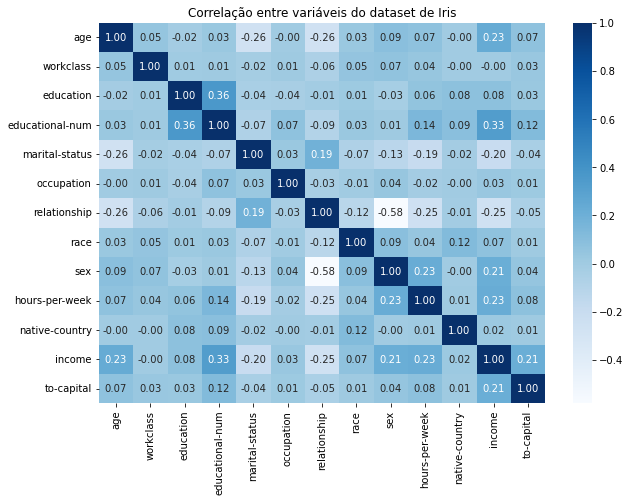

In [34]:
plt.figure(figsize=(10, 7))
sns.heatmap(ds.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de Iris')
plt.show()

In [35]:
xgb = XGBClassifier()
xgb.fit(X, y)

[09:18:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
xgb.feature_importances_

array([0.03016664, 0.01849614, 0.01063343, 0.13638902, 0.12929821,
       0.03044081, 0.44595826, 0.01340925, 0.02466681, 0.02595567,
       0.01159719, 0.12298858], dtype=float32)

In [37]:
feature_imp = pd.Series(xgb.feature_importances_,index=X.columns).sort_values(ascending=False)

In [38]:
feature_imp

relationship       0.445958
educational-num    0.136389
marital-status     0.129298
to-capital         0.122989
occupation         0.030441
age                0.030167
hours-per-week     0.025956
sex                0.024667
workclass          0.018496
race               0.013409
native-country     0.011597
education          0.010633
dtype: float32

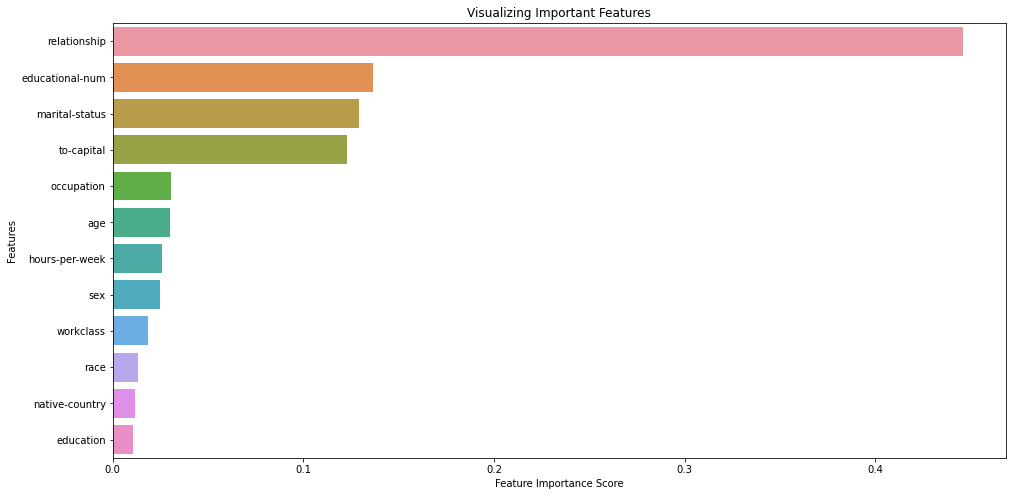

In [39]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
visualiza_features_importantes(feature_imp)

#### Selecionando as melhores feature com a melhor pontuação
#### Selecting the best features for up a certain score

In [40]:
select_fea = []
for feature, importance in feature_imp.iteritems():
    if importance > 0.03:
        print("{}:\t{}".format(feature, importance))
        select_fea.append(feature)

relationship:	0.4459582567214966
educational-num:	0.13638901710510254
marital-status:	0.12929821014404297
to-capital:	0.12298858165740967
occupation:	0.030440809205174446
age:	0.030166637152433395


#### Separando as features para o treino e teste
#### separating features for training and test

In [41]:
X_imp = ds[select_fea]
y_imp = ds["income"]

In [42]:
Ximp_train, Ximp_test, yimp_train, yimp_test = train_test_split(X_imp, y_imp, test_size=0.3, random_state=1)

### Verificando a acurácia dos 5 modelos escolidos
### Checking the accuracy of 5 chosen models

In [43]:
print("randomForest accuracy:{}".format(Accuracy(rclf,X_imp,y_imp)))
print("decisiontree accuracy:{}".format(Accuracy(tree_clf,X_imp,y_imp)))
print("KNN accuracy:{}".format(Accuracy(knn,X_imp,y_imp)))
print("SVM accuracy:{}".format(Accuracy(svm,X_imp,y_imp)))
print("XGBoost accuracy:{}".format(Accuracy(xgb,X_imp,y_imp)))

randomForest accuracy:0.8461569960280086
decisiontree accuracy:0.8367183980999959
KNN accuracy:0.8446214323737766
SVM accuracy:0.802526514065763
[09:22:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:22:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:22:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the ol

## Avaliando os resultados do modelo
## Evaluate the model results

#### Comparando o modelo XGBoost com o que o feature importance foi aplicado
#### Comparing the XGBoost with what feature importance was applied to

In [44]:
# Apenas o modelo
# Just the model
xgb.fit(X_train, y_train)
result = xgb.predict(X_test)

[09:22:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
print(metrics.classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11112
           1       0.77      0.66      0.71      3541

    accuracy                           0.87     14653
   macro avg       0.83      0.80      0.81     14653
weighted avg       0.86      0.87      0.87     14653



In [46]:
# O modelo com a feature importance
# The model with feature importance
xgb.fit(Ximp_train, yimp_train)
result_imp = xgb.predict(Ximp_test)

[09:22:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
print(metrics.classification_report(yimp_test,result_imp))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     11112
           1       0.78      0.63      0.70      3541

    accuracy                           0.87     14653
   macro avg       0.83      0.79      0.81     14653
weighted avg       0.86      0.87      0.86     14653



 - Mesmo utilizando a feature importance o modelo trabalha melhor com todas as colunas, não apenas com as consideradas mais importantes
 - O modelo que ganho foi o XGBoost sem o feture importance por uma pequena diferença no recall
---------------------------------------------------------------------------------------------------------------------------
- Even using the feature importance the model works better with all the columns of the dataset, not just the ones considered most important
- the model that won was the XGBoost without feature importance for a tiny difference on recall

## Pipeline para procurar a melhora do meu modelo
## Pipeline to search an improvement of my model

- os algoritmos de Machine Learning têm melhor desempenho ou convergem mais rápido quando os recursos estão em uma escala relativamente semelhante e/ou próximo da distribuição normal.
- Preciso padronizar os algoritmos para não haver variancia nos dados quando usarmos o modelo
- O min_max superou os outros parametros 
---------------------------------------------------------------------------------------------------------------------------
- machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed.
- I need to standardize the algorithms so there is no variance in the data when we use the model
- The min_max suprassed the other models

In [48]:
xgbc = xgb.fit(X_train,y_train)

[09:22:44] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [49]:
# testei 2 padronizadores nos dados para ver a diferença na acurácia nos dados do meu melhor modelo
# I tested 2 standardizers on the data to see the difference in accuracy in the data of my best model

# Pipeline com o pré-processador  StandardScaler
# Pipelne with StanardScaler preprocessor:
pip_scaler = Pipeline([ ('scaler', StandardScaler()),('xgbc', XGBClassifier(eval_metric='mlogloss',))])

# Pipeline com o pré-processador  MinMaxScaler:
# Pipeline with MinMaxScaler preprocessor:
pip_min_max = Pipeline([ ('min_max_scaler', MinMaxScaler()),('xgbc', XGBClassifier(eval_metric='mlogloss',))])

print("scaler accuracy:{}".format(Accuracy(pip_scaler,X,y)))
print("min_max accuracy:{}".format(Accuracy(pip_min_max,X,y)))

scaler accuracy:0.873223864706605
min_max accuracy:0.8732443388886614


### Tuning  do modelo buscando os melhores parametros para um melhor desempenho
### Model Tuning searching for the best parameters for a better performance

- Os parâmetros:
- The Parameters:
   - eta
   - gamma
   - max_depth
   - min_child_weight
   - sampling_method

In [50]:
# o shrinkaze(Mais conhecido como o learning rate), usado em atualizações para previnir o overfitting
# the shrinkaze(most famous as Learning rate), used in update to prevents overfitting
eta_values = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

# Reduz a perda nescessaria no minimo para adicionar uma nova partição  a um nó da folha
# Quanto maior a gama, mais conservador será o algoritmo.
# Minimum loss reduction required to make a further partition on a leaf node of the tree. 
# The larger gamma is, the more conservative the algorithm will be.
gamma_values = [2, 5, 10, 15]

# valores de profundidade maxima da árvore
# O aumento desnescessario desse parametro torma o modelo mais complexo e propensos a overfitting
# Max_depth values of the tree
#Increasing this value will make the model more complex and more likely to overfit
max_depth_values = [10, 20, 50, 100]

# Soma mínima do peso da instância (hessian)
# Minimum sum of instance weight (hessian) 
min_child_weight_values = [1, 5, 10, 15]

# O método a ser usado para amostrar as instâncias de treinamento.
# The method to use to sample the training instances.
sampling_method_values = ['uniform', 'subsample', 'gradient_based']

#retirar warnings para não ficar poluida a tela
eval_metric_values = ['mlogloss']


# Dicionário para receber todos os valores e parametros acima
# Dictionary to receive all the parameters and values above
params_grid = dict(xgbc__eta=eta_values,
                   xgbc__gamma=gamma_values,
                   xgbc__max_depth=max_depth_values,
                   xgbc__min_child_weight=min_child_weight_values,
                   xgbc__sampling_method=sampling_method_values,
                   xgbc__eval_metric=eval_metric_values)
            

# Visualizando o dicionário
# viewing the dictionary
params_grid

{'xgbc__eta': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
 'xgbc__gamma': [2, 5, 10, 15],
 'xgbc__max_depth': [10, 20, 50, 100],
 'xgbc__min_child_weight': [1, 5, 10, 15],
 'xgbc__sampling_method': ['uniform', 'subsample', 'gradient_based'],
 'xgbc__eval_metric': ['mlogloss']}

In [51]:
# Instanciando o GridSeach com o modelo que vou utilizar, parametros de n_jobs e scoring
# Instantiating the GridSeach with the model I'm going to use, n_jobs and scoring parameters
grid = GridSearchCV(pip_min_max, params_grid, n_jobs= 5, scoring= 'accuracy')

In [52]:
# Aplicando o grid nos dados de treino e Classe
# Applying the grid on training and class datas
grid.fit(X,y)

GridSearchCV(estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('xgbc',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      eval_metric='mlogloss',
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                   

In [53]:
# O melhor score
# The best Score
grid.best_score_

0.873326296499088

- Usarei o StandardScaler
- I will use the StandardScaler

In [54]:
# Imprimindo os scores por combinação
# Printing the scores by combination
grid.cv_results_

{'mean_fit_time': array([ 6.93584561,  0.0531127 ,  6.28667812, ..., 23.12172265,
         0.05515409, 19.48287506]),
 'std_fit_time': array([1.32837257e-01, 1.59312658e-02, 2.04394925e-01, ...,
        2.21432882e+00, 2.67294773e-03, 4.90194971e+00]),
 'mean_score_time': array([0.0312429 , 0.        , 0.01562109, ..., 0.02076354, 0.        ,
        0.01689334]),
 'std_score_time': array([1.71127606e-02, 0.00000000e+00, 9.84180805e-07, ...,
        3.40414467e-03, 0.00000000e+00, 3.68715723e-03]),
 'param_xgbc__eta': masked_array(data=[0.0001, 0.0001, 0.0001, ..., 0.3, 0.3, 0.3],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_xgbc__eval_metric': masked_array(data=['mlogloss', 'mlogloss', 'mlogloss', ..., 'mlogloss',
                    'mlogloss', 'mlogloss'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_xgbc__gamma': maske

In [55]:
# Os melhores parametros
# The best parameters
grid.best_params_

{'xgbc__eta': 0.1,
 'xgbc__eval_metric': 'mlogloss',
 'xgbc__gamma': 2,
 'xgbc__max_depth': 10,
 'xgbc__min_child_weight': 5,
 'xgbc__sampling_method': 'uniform'}

### Finalizando o modelo com os melhores parametros
### Finalizing the model with the best parameters

In [56]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [57]:
modeloxgb = XGBClassifier(eta=0.1, eval_metric='mlogloss', gamma=2,
                           max_depth=10, min_child_weight=5, sampling_method='uniform')

In [58]:
modeloxgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, eval_metric='mlogloss', gamma=2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1,
              sampling_method='uniform', scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)

In [59]:
# Temos mais uma pequena melhora no modelo
# We have another small improvment on the model
xgb_result = cross_val_predict(modeloxgb, X, y, cv=10)
print(metrics.classification_report(y,xgb_result))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     37155
           1       0.78      0.65      0.71     11687

    accuracy                           0.87     48842
   macro avg       0.84      0.80      0.82     48842
weighted avg       0.87      0.87      0.87     48842



In [60]:
joblib.dump(modeloxgb, 'model.pkl')

['model.pkl']

In [61]:
joblib.load('model.pkl')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, eval_metric='mlogloss', gamma=2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1,
              sampling_method='uniform', scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)